<a href="https://colab.research.google.com/github/PyAshishMhatre/OnlineNewsPopularity_IE7374_MachineLearning/blob/main/ProjectGroup_12_NewsPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import random 
from matplotlib import pyplot as plt 
import scipy 
import seaborn as sns

In [ ]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [ ]:
df.shape

(39644, 61)

In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
print(df.isnull().sum())
#no nulls 

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


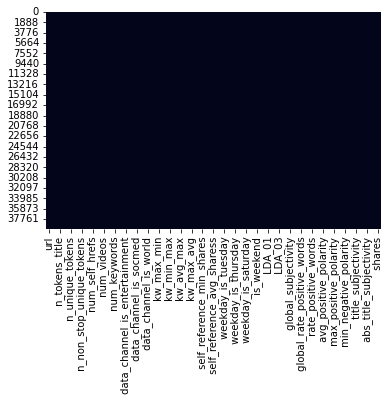

In [ ]:
sns.heatmap(df.isnull(), cbar=False) #None Nulls confirmed 

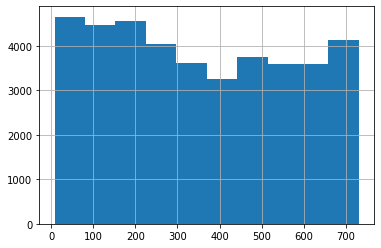

In [ ]:
df[' timedelta'].hist()

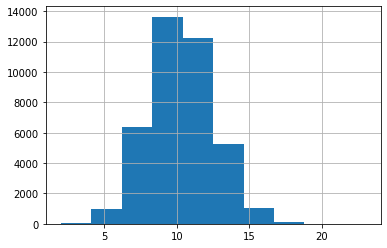

In [ ]:
df[' n_tokens_title'].hist()

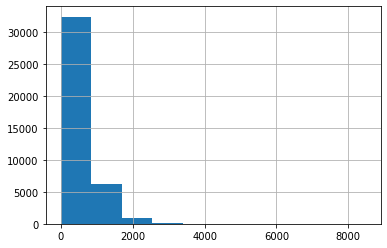

In [ ]:
df[' n_tokens_content'].hist()

#We have most of the data having content words count less than 2000 

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33f994c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33f96d9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33f974a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33f9744d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33f994650>,
  <matplotlib.lines.Line2D at 0x7fb33f96d490>]}

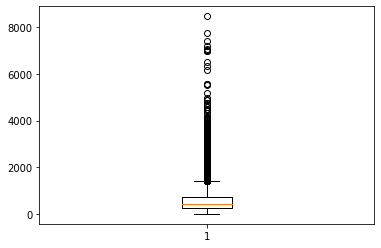

In [ ]:
plt.boxplot(df[' n_tokens_content'])

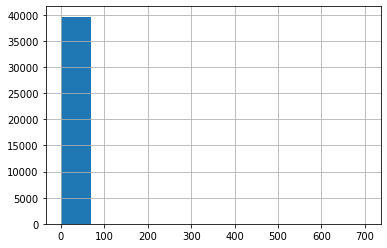

In [ ]:
df[' n_unique_tokens'].hist()

In [ ]:
df[' n_unique_tokens'].describe()

count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name:  n_unique_tokens, dtype: float64

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142.0,9.0,1570.0,701.0,1042.0,650.0,11.0,10.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5900


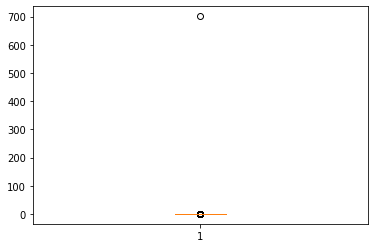

In [ ]:
plt.boxplot(df[' n_unique_tokens'])

df[df[' n_unique_tokens'] == 701] #remove row 31037 has a outlier at 701 unique tokens 


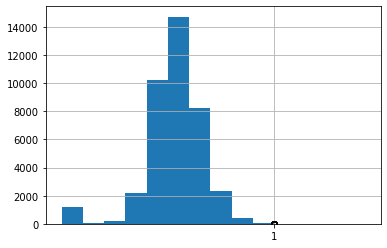

In [ ]:
plt.boxplot( df[df[' n_unique_tokens'] != 701][' n_unique_tokens'] )

( df[df[' n_unique_tokens'] != 701][' n_unique_tokens'] ).hist()

#after droping the row with 701 unique tokens we have a normal distribution of data 

In [ ]:
df.drop(df.index[31037], inplace=True) #Droping the row 

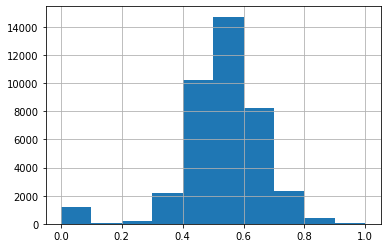

In [ ]:
df[' n_unique_tokens'].hist() #Checking after droping

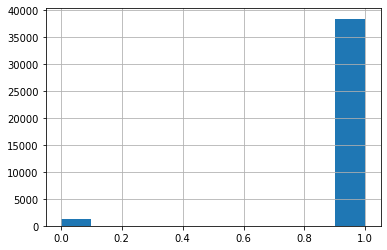

In [ ]:
df[' n_non_stop_words'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33a5dc790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33a44f890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33a44c5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33a44c810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33a45ed10>,
  <matplotlib.lines.Line2D at 0x7fb33a44f050>]}

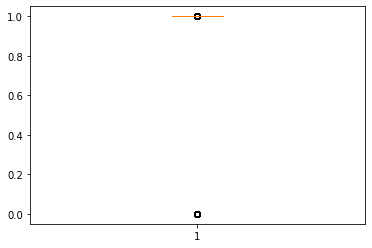

In [ ]:
plt.boxplot(df[' n_non_stop_words'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33a427710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33a421f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33a42d990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33a421d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33a427d10>,
  <matplotlib.lines.Line2D at 0x7fb33a427590>]}

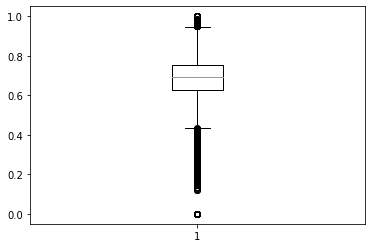

In [ ]:
plt.boxplot(df[' n_non_stop_unique_tokens'])

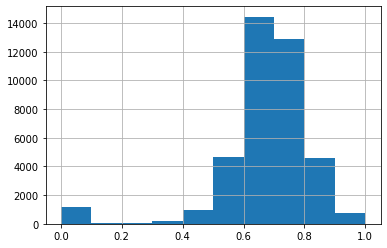

In [ ]:
df[' n_non_stop_unique_tokens'].hist()

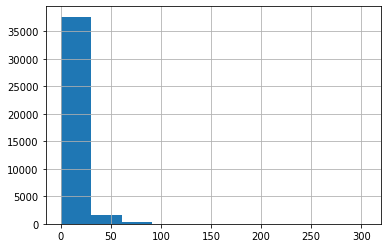

In [ ]:
df[' num_hrefs'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fb329a359d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb329950690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3299b47d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3299503d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb32ca89b10>,
  <matplotlib.lines.Line2D at 0x7fb32994e950>]}

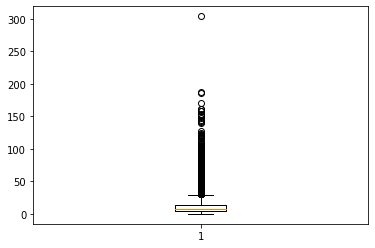

In [ ]:
plt.boxplot(df[' num_hrefs'])

In [ ]:
df[' num_hrefs'].describe() 

#better to drop as we have highly left skewed data and outliers in higher range 

count    39643.000000
mean        10.883687
std         11.332160
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name:  num_hrefs, dtype: float64

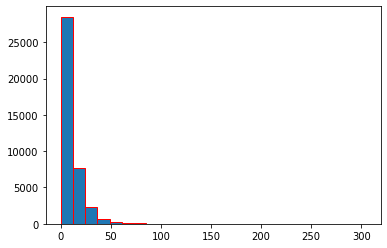

In [ ]:
plt.hist(df[' num_hrefs'], edgecolor="red", bins=25)
plt.show()

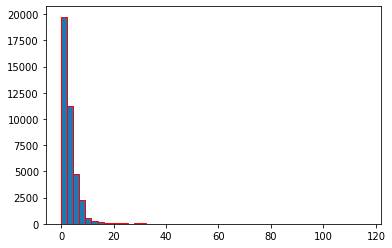

In [ ]:
plt.hist(df[' num_self_hrefs'], edgecolor="red", bins=50)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c2c5810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33d1b7810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33bea3fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33be6d3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33cceadd0>,
  <matplotlib.lines.Line2D at 0x7fb33be3a850>]}

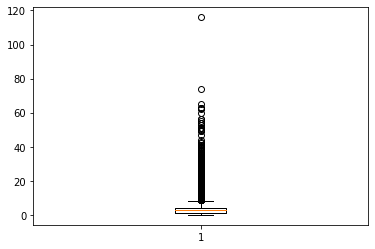

In [ ]:
plt.boxplot(df[' num_self_hrefs'])

#better to drop as we have highly left skewed data and outliers in higher range but we would like to consider this variable

In [ ]:
np.corrcoef(df[' num_self_hrefs'], df[' num_hrefs']) #No significant Correlation between two variables 

array([[1.        , 0.39646705],
       [0.39646705, 1.        ]])

(array([3.1011e+04, 4.0620e+03, 2.3860e+03, 1.0770e+03, 4.1300e+02,
        3.2500e+02, 5.5000e+01, 1.4300e+02, 5.1000e+01, 5.3000e+01,
        1.9000e+01, 1.3000e+01, 7.0000e+00, 1.0000e+00, 7.0000e+00,
        1.6000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,   6.4,  12.8,  19.2,  25.6,  32. ,  38.4,  44.8,  51.2,
         57.6,  64. ,  70.4,  76.8,  83.2,  89.6,  96. , 102.4, 108.8,
        115.2, 121.6, 128. ]),
 <a list of 20 Patch objects>)

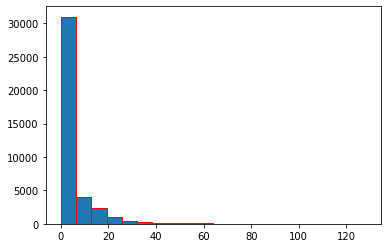

In [ ]:
plt.hist(df[' num_imgs'], edgecolor="red", bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb329633610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb329601610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb329a55d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb329a55210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb329a66450>,
  <matplotlib.lines.Line2D at 0x7fb329a665d0>]}

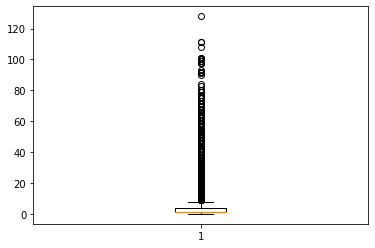

In [ ]:
plt.boxplot(df[' num_imgs'])

In [ ]:
df[' num_imgs'].describe()

count    39643.000000
mean         4.542971
std          8.306262
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name:  num_imgs, dtype: float64

(array([3.7469e+04, 5.3800e+02, 6.5000e+02, 3.3600e+02, 3.0200e+02,
        2.4300e+02, 3.1000e+01, 2.9000e+01, 2.0000e+00, 2.0000e+00,
        1.1000e+01, 7.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.4000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  4.55,  9.1 , 13.65, 18.2 , 22.75, 27.3 , 31.85, 36.4 ,
        40.95, 45.5 , 50.05, 54.6 , 59.15, 63.7 , 68.25, 72.8 , 77.35,
        81.9 , 86.45, 91.  ]),
 <a list of 20 Patch objects>)

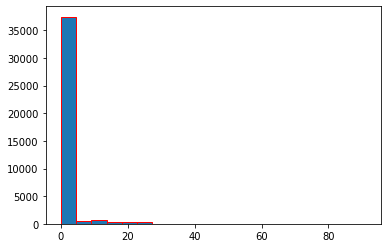

In [ ]:
plt.hist(df[' num_videos'], edgecolor="red", bins=20) 

#Delete highly left skewed with most of the videos having 1 video 

In [ ]:
df[' num_videos'].describe()

count    39643.000000
mean         1.249905
std          4.107902
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name:  num_videos, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33dc76ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33dc03d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33dc0fbd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33dc0f610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33dc03410>,
  <matplotlib.lines.Line2D at 0x7fb33dc033d0>]}

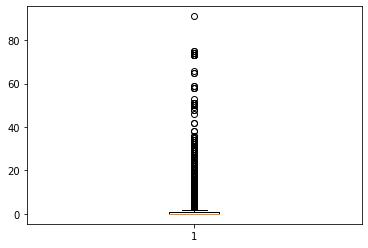

In [ ]:
plt.boxplot(df[' num_videos'])

(array([1.1810e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.9000e+02,
        6.1220e+03, 2.0881e+04, 1.0034e+04, 1.0760e+03, 1.2800e+02,
        2.1000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.        , 0.40207668, 0.80415335, 1.20623003, 1.60830671,
        2.01038339, 2.41246006, 2.81453674, 3.21661342, 3.6186901 ,
        4.02076677, 4.42284345, 4.82492013, 5.22699681, 5.62907348,
        6.03115016, 6.43322684, 6.83530351, 7.23738019, 7.63945687,
        8.04153355]),
 <a list of 20 Patch objects>)

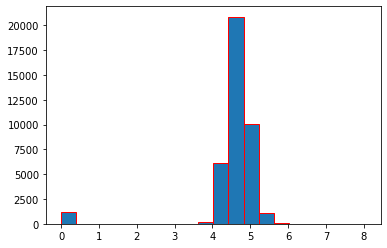

In [ ]:
plt.hist(df[' average_token_length'], edgecolor="red", bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33e027c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33de36a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33de30e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33de30810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33de1e850>,
  <matplotlib.lines.Line2D at 0x7fb33de360d0>]}

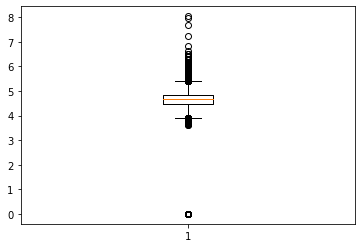

In [ ]:
plt.boxplot(df[' average_token_length'])

In [ ]:
df[df[' average_token_length'] == 0] 

#We see that 61 datarows have 0 average token length which does make sense but we also observe that col. n_token_content also has 0 respectively
#therefore we should check if there is a high correlation between the two columns

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,http://mashable.com/2013/01/23/actual-facebook...,715.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,http://mashable.com/2014/12/26/holiday-decorat...,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,0.166667,0.250000,6100
39601,http://mashable.com/2014/12/26/minority-author...,9.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.400000,0.125000,0.400000,2300
39613,http://mashable.com/2014/12/26/the-interview-b...,9.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1600
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,5700


In [ ]:
df[df[' n_tokens_content'] == 0] 

#We get the exact same rows as above calculting the correlation Coeff.

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,http://mashable.com/2013/01/23/actual-facebook...,715.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,http://mashable.com/2014/12/26/holiday-decorat...,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,0.166667,0.250000,6100
39601,http://mashable.com/2014/12/26/minority-author...,9.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.400000,0.125000,0.400000,2300
39613,http://mashable.com/2014/12/26/the-interview-b...,9.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1600
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,5700


In [ ]:
np.corrcoef(df[' average_token_length'], df[' n_tokens_content']) 

# we dont see a high correlation between the two variables 

array([[1.        , 0.16778963],
       [0.16778963, 1.        ]])

(array([  51.,    0.,    0.,    0.,    0.,   45.,    0.,    0.,    0.,
           0.,    0.,  635.,    0.,    0.,    0.,    0., 2427.,    0.,
           0.,    0.,    0.,    0., 4829.,    0.,    0.,    0.,    0.,
        6801.,    0.,    0.,    0.,    0.,    0., 7321.,    0.,    0.,
           0.,    0., 6094.,    0.,    0.,    0.,    0.,    0., 4732.,
           0.,    0.,    0.,    0., 6708.]),
 array([ 1.  ,  1.18,  1.36,  1.54,  1.72,  1.9 ,  2.08,  2.26,  2.44,
         2.62,  2.8 ,  2.98,  3.16,  3.34,  3.52,  3.7 ,  3.88,  4.06,
         4.24,  4.42,  4.6 ,  4.78,  4.96,  5.14,  5.32,  5.5 ,  5.68,
         5.86,  6.04,  6.22,  6.4 ,  6.58,  6.76,  6.94,  7.12,  7.3 ,
         7.48,  7.66,  7.84,  8.02,  8.2 ,  8.38,  8.56,  8.74,  8.92,
         9.1 ,  9.28,  9.46,  9.64,  9.82, 10.  ]),
 <a list of 50 Patch objects>)

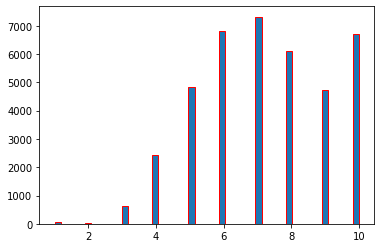

In [ ]:
plt.hist(df[' num_keywords'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33dc0da50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33dc14d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33dc57550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33dc14250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33dc0ded0>,
  <matplotlib.lines.Line2D at 0x7fb33e0c8a90>]}

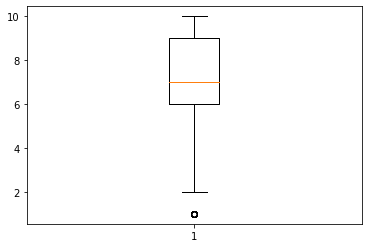

In [ ]:
plt.boxplot(df[' num_keywords'])

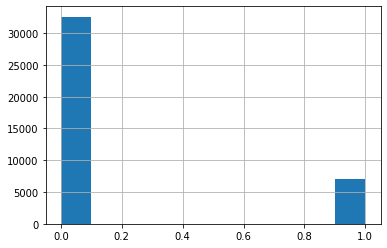

In [ ]:
df[' data_channel_is_entertainment'].hist() 

#dichotomous variable 1 = Entertainment 0 = Not Entertainment

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33dc6af90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33e15aed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33dbf27d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33dbf2b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33dbf9d50>,
  <matplotlib.lines.Line2D at 0x7fb33e15abd0>]}

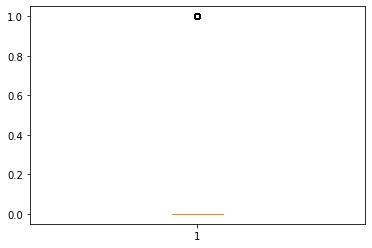

In [ ]:
plt.boxplot(df[' data_channel_is_entertainment'])

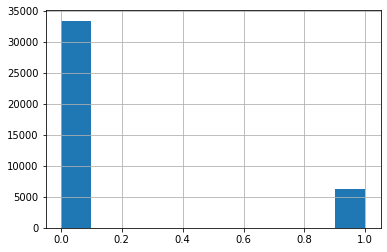

In [ ]:
df[' data_channel_is_bus'].hist() 

#dichotomous variable 1 = business 0 = Not business

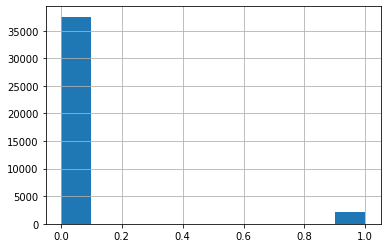

In [ ]:
df[' data_channel_is_lifestyle'].hist() 
#dichotomous variable 1 = lifestyle 0 = Not lifestyle

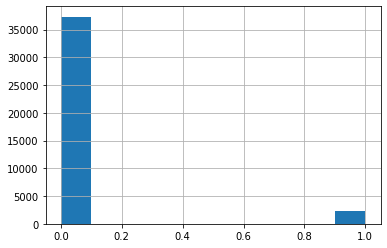

In [ ]:
df[' data_channel_is_socmed'].hist() 
#dichotomous variable 1 = social media 0 = Not social media

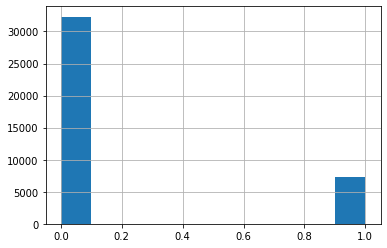

In [ ]:
df[' data_channel_is_tech'].hist() 
#dichotomous variable 1 = technology 0 = Not technology

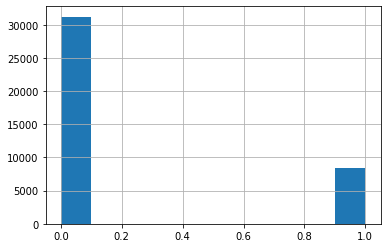

In [ ]:
df[' data_channel_is_world'].hist() 
#dichotomous variable 1 = world 0 = Not world

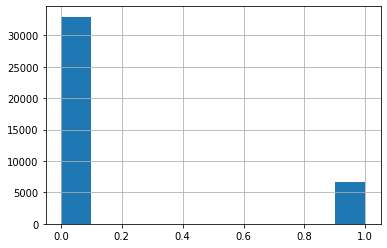

In [ ]:
df[' weekday_is_monday'].hist() 

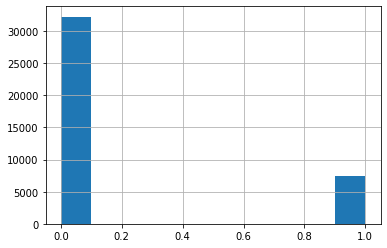

In [ ]:
df[' weekday_is_tuesday'].hist() 

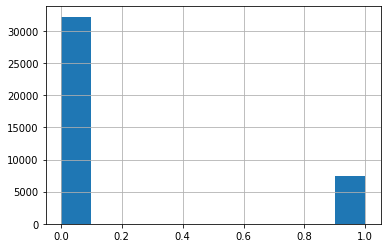

In [ ]:
df[' weekday_is_wednesday'].hist() 

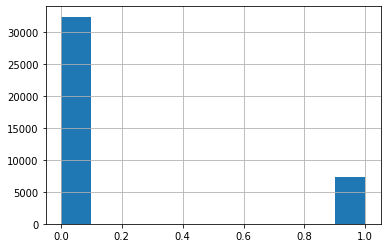

In [ ]:
df[' weekday_is_thursday'].hist() 

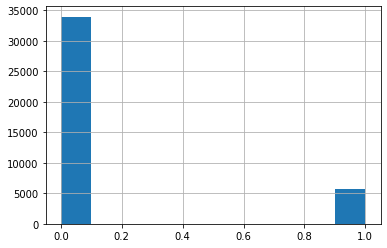

In [ ]:
df[' weekday_is_friday'].hist() 

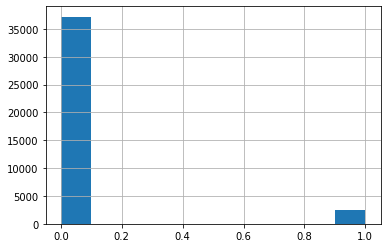

In [ ]:
df[' weekday_is_saturday'].hist() 

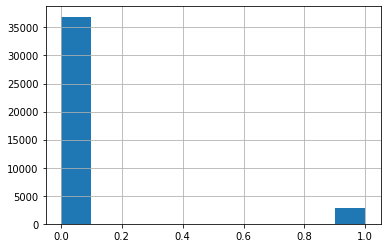

In [ ]:
df[' weekday_is_sunday'].hist() 

(array([1.1600e+02, 1.6030e+03, 1.2892e+04, 1.3962e+04, 6.1960e+03,
        2.9270e+03, 1.1820e+03, 3.5900e+02, 1.4500e+02, 8.1000e+01,
        4.8000e+01, 3.1000e+01, 1.5000e+01, 1.0000e+01, 1.2000e+01,
        1.3000e+01, 7.0000e+00, 1.0000e+01, 8.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.        ,   871.35319892,  1742.70639783,  2614.05959675,
         3485.41279566,  4356.76599458,  5228.1191935 ,  6099.47239241,
         6970.82559133,  7842.17879024,  8713.53198916,  9584.88518808,
        10456.23838699, 11327.59158591, 12198.94478482, 13070.29798374,
        13941.65118266, 14813.

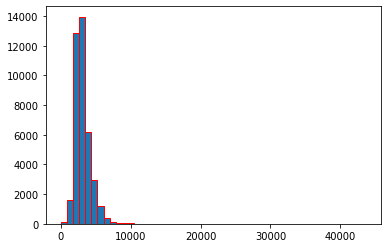

In [ ]:
plt.hist(df[' kw_avg_avg'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33eb82450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33eb92a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33ebaaa50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33ebaae90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33eb82650>,
  <matplotlib.lines.Line2D at 0x7fb33eb92510>]}

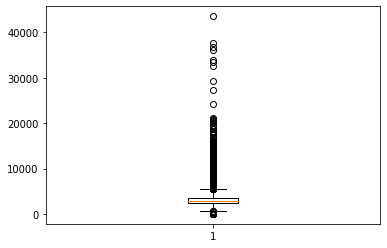

In [ ]:
plt.boxplot(df[' kw_avg_avg'])

In [ ]:
df[' kw_avg_avg'].describe()

count    39643.000000
mean      3135.864283
std       1318.166544
min          0.000000
25%       2382.443334
50%       2870.047184
75%       3600.311954
max      43567.659946
Name:  kw_avg_avg, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33ea4fc50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33ea062d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33ea3e6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33ea3ef90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33ea06a90>,
  <matplotlib.lines.Line2D at 0x7fb33ea06bd0>]}

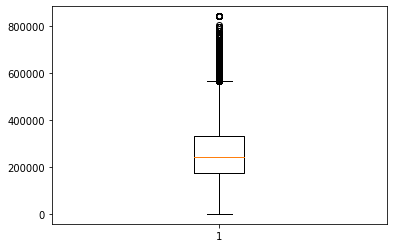

In [ ]:
plt.boxplot(df[' kw_avg_max'])

(array([ 3245.,  6104., 11564.,  9358.,  4799.,  2488.,  1434.,   349.,
          215.,    87.]),
 array([     0.,  84330., 168660., 252990., 337320., 421650., 505980.,
        590310., 674640., 758970., 843300.]),
 <a list of 10 Patch objects>)

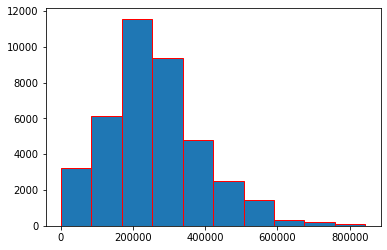

In [ ]:
plt.hist(df[' kw_avg_max'], edgecolor="red", bins=10)

(array([3.833e+04, 9.200e+02, 1.800e+02, 8.100e+01, 3.900e+01, 2.800e+01,
        2.300e+01, 5.000e+00, 3.000e+00, 9.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.00000000e+00,  8.55577143e+02,  1.71215429e+03,  2.56873143e+03,
         3.42530857e+03,  4.28188571e+03,  5.13846286e+03,  5.99504000e+03,
         6.85161714e+03,  7.70819429e+03,  8.56477143e+03,  9.42134857e+03,
         1.02779257e+04,  1.11345029e+04,  1.19910800e+04,  1.28476571e+04,
         1.37042343e+04,  1.45608114e+04,  1.54173886e+04,  1.62739657e+

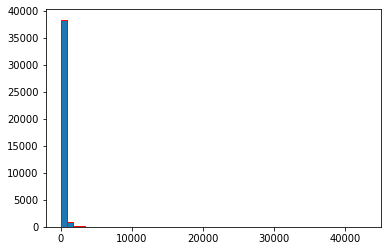

In [ ]:
plt.hist(df[' kw_avg_min'], edgecolor="red", bins=50)

#can drop highly left skewed

{'boxes': [<matplotlib.lines.Line2D at 0x7fb3297d2c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb3297cdc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3297c9110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3297c9790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb3297cd1d0>,
  <matplotlib.lines.Line2D at 0x7fb3297cd710>]}

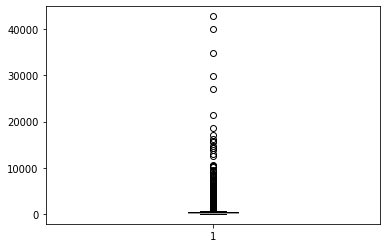

In [ ]:
plt.boxplot(df[' kw_avg_min'])

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33dbb22d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33db7be50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33dbb50d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33de64750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33e178310>,
  <matplotlib.lines.Line2D at 0x7fb33db46ad0>]}

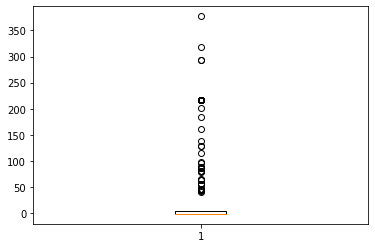

In [ ]:
plt.boxplot(df[' kw_min_min'])

(array([3.4966e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00,
        4.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 4.6360e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -1.  ,   6.56,  14.12,  21.68,  29.24,  36.8 ,  44.36,  51.92,
         59.48,  67.04,  74.6 ,  82.16,  89.72,  97.28, 104.84, 112.4 ,
        119.96, 127.52, 135.08, 142.64, 150.2 , 157.76, 165.32, 172.88,
        180.44, 188.  , 195.56, 203.12, 210.68, 218.24, 225.8 , 233.36,
        240.92, 248.48, 256.04

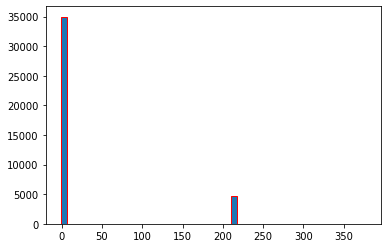

In [ ]:
plt.hist(df[' kw_min_min'], edgecolor="red", bins=50)

#can drop highly left skewd

In [ ]:
df[' kw_min_min'].describe()

count    39643.000000
mean        26.107484
std         69.633960
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name:  kw_min_min, dtype: float64

(array([17173.,   626.,  2472.,  3616.,  3167.,  3886.,  3174.,  1961.,
         1904.,  1664.]),
 array([-1.00000000e+00,  3.60403982e+02,  7.21807964e+02,  1.08321195e+03,
         1.44461593e+03,  1.80601991e+03,  2.16742389e+03,  2.52882787e+03,
         2.89023186e+03,  3.25163584e+03,  3.61303982e+03]),
 <a list of 10 Patch objects>)

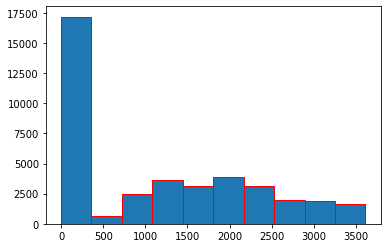

In [ ]:
plt.hist(df[' kw_min_avg'], edgecolor="red", bins=10)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33ef4b690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33ef5d6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33ef71710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33ef711d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33ef4bc10>,
  <matplotlib.lines.Line2D at 0x7fb33ef5d190>]}

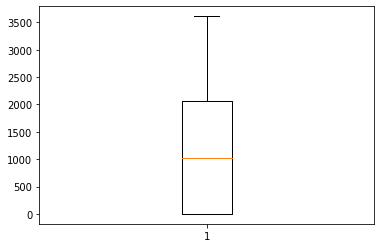

In [ ]:
plt.boxplot(df[' kw_min_avg'])

(array([3.3744e+04, 2.6820e+03, 1.2340e+03, 5.3500e+02, 3.5700e+02,
        2.3800e+02, 1.6200e+02, 5.2000e+01, 1.5900e+02, 9.0000e+00,
        2.0000e+00, 1.7000e+01, 2.0400e+02, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.6000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.1000e+01, 0.0000e+00, 2.0000e+00, 5.4000e+01,
        6.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.7000e+01]),
 array([     0.,  16866.,  33732.,  50598.,  67464.,  84330., 101196.,
        118062., 134928., 151794., 168660., 185526., 202392., 219258.,
        236124., 252990., 269856., 286722., 303588., 320454., 337320.,
        354186., 371052., 387918., 404784., 421650., 438516., 455382.,
        472248., 489114., 505980.,

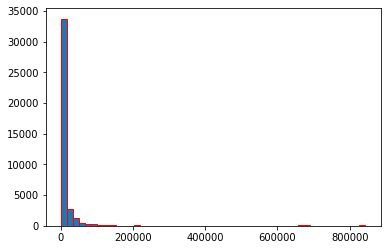

In [ ]:
plt.hist(df[' kw_min_max'], edgecolor="red", bins=50)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33efef8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33effc950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33eff8990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33eff8450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33efefe90>,
  <matplotlib.lines.Line2D at 0x7fb33effc410>]}

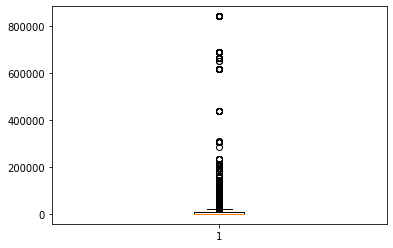

In [ ]:
plt.boxplot(df[' kw_min_max'])

In [ ]:
df[' kw_min_max'].describe()

count     39643.000000
mean      13612.114774
std       57986.741144
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name:  kw_min_max, dtype: float64

(array([3.8879e+04, 4.5100e+02, 1.3000e+02, 7.2000e+01, 3.8000e+01,
        1.6000e+01, 1.9000e+01, 2.0000e+00, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0.,   5968.,  11936.,  17904.,  23872.,  29840.,  35808.,
         41776.,  47744.,  53712.,  59680.,  65648.,  71616.,  77584.,
         83552.,  89520.,  95488., 101456., 107424., 113392., 119360.,
        125328., 131296., 137264., 143232., 149200., 155168., 161136.,
        167104., 173072., 179040.,

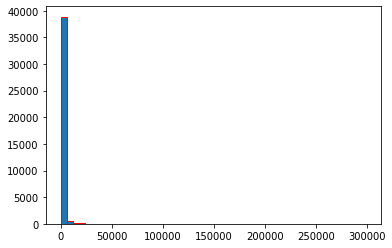

In [ ]:
plt.hist(df[' kw_max_min'], edgecolor="red", bins=50)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33f1c6310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33f1d6350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33f1ee390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33f1d6e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33f1c6890>,
  <matplotlib.lines.Line2D at 0x7fb33f1c6dd0>]}

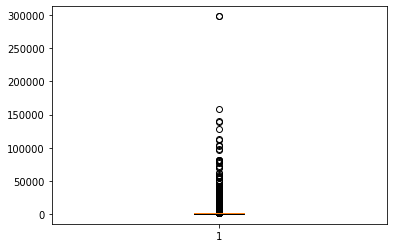

In [ ]:
plt.boxplot(df[' kw_max_min'])

(array([2.9341e+04, 8.8760e+03, 7.5600e+02, 2.7400e+02, 1.3400e+02,
        5.5000e+01, 6.1000e+01, 1.7000e+01, 2.9000e+01, 1.5000e+01,
        1.1000e+01, 1.0000e+01, 7.0000e+00, 1.4000e+01, 7.0000e+00,
        2.0000e+00, 5.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0.,   5968.,  11936.,  17904.,  23872.,  29840.,  35808.,
         41776.,  47744.,  53712.,  59680.,  65648.,  71616.,  77584.,
         83552.,  89520.,  95488., 101456., 107424., 113392., 119360.,
        125328., 131296., 137264., 143232., 149200., 155168., 161136.,
        167104., 173072., 179040.,

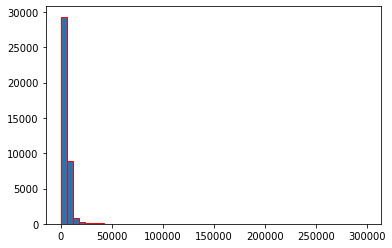

In [ ]:
plt.hist(df[' kw_max_avg'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33d958790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33d9437d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33d96d810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33d96d2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33d958d10>,
  <matplotlib.lines.Line2D at 0x7fb33d943290>]}

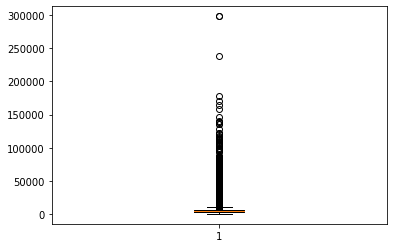

In [ ]:
plt.boxplot(df[' kw_max_avg'])

(array([8.1000e+01, 2.3400e+02, 2.7300e+02, 8.3100e+02, 1.6700e+03,
        2.0000e+00, 6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 7.3000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.2630e+03, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        3.9860e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0203e+04]),
 array([     0.,  16866.,  33732.,  50598.,  67464.,  84330., 101196.,
        118062., 134928., 151794., 168660., 185526., 202392., 219258.,
        236124., 252990., 269856., 286722., 303588., 320454., 337320.,
        354186., 371052., 387918., 404784., 421650., 438516., 455382.,
        472248., 489114., 505980.,

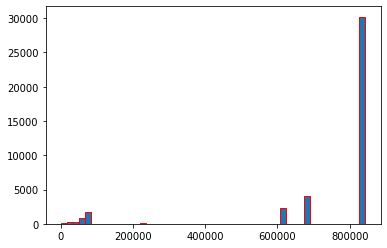

In [ ]:
plt.hist(df[' kw_max_max'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33d460e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33d466e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33d46ded0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33d46d990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33d466410>,
  <matplotlib.lines.Line2D at 0x7fb33d466950>]}

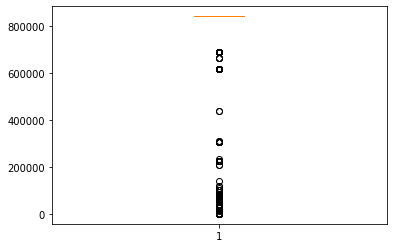

In [ ]:
plt.boxplot(df[' kw_max_max'])

(array([3.8175e+04, 7.7800e+02, 2.5900e+02, 1.8600e+02, 5.8000e+01,
        7.8000e+01, 4.7000e+01, 6.0000e+00, 1.2000e+01, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.4000e+01,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  16866.,  33732.,  50598.,  67464.,  84330., 101196.,
        118062., 134928., 151794., 168660., 185526., 202392., 219258.,
        236124., 252990., 269856., 286722., 303588., 320454., 337320.,
        354186., 371052., 387918., 404784., 421650., 438516., 455382.,
        472248., 489114., 505980.,

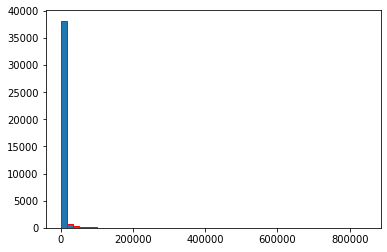

In [ ]:
plt.hist(df[' self_reference_min_shares'], edgecolor="red", bins=50)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33d2ec810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33d3cb5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33d2c14d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33d31a410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33d32c250>,
  <matplotlib.lines.Line2D at 0x7fb33d32cf10>]}

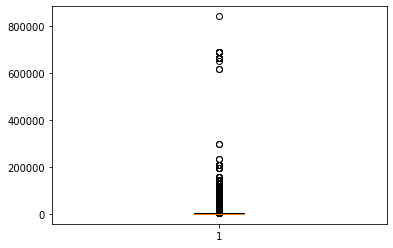

In [ ]:
plt.boxplot(df[' self_reference_min_shares'])

(array([3.3707e+04, 3.3280e+03, 9.9800e+02, 4.8400e+02, 2.6800e+02,
        1.9500e+02, 1.9700e+02, 6.4000e+01, 6.7000e+01, 3.1000e+01,
        1.9000e+01, 6.4000e+01, 5.0000e+01, 1.1000e+01, 4.0000e+00,
        1.0000e+01, 2.2000e+01, 2.0000e+00, 1.2000e+01, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00, 7.0000e+00,
        0.0000e+00, 1.0000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.1000e+01,
        5.0000e+00, 7.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.00

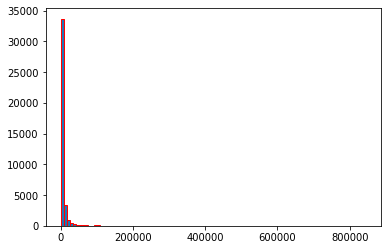

In [ ]:
plt.hist(df[' self_reference_avg_sharess'], edgecolor="red", bins=100)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33d19a690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33d186ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33d1be810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33d1be150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33d1f9cd0>,
  <matplotlib.lines.Line2D at 0x7fb33d1eaed0>]}

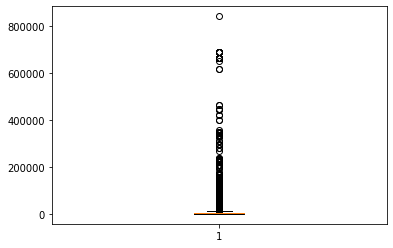

In [ ]:
plt.boxplot(df[' self_reference_avg_sharess'])

In [ ]:
df[' self_reference_avg_sharess'].describe()

count     39643.000000
mean       6401.684395
std       24211.637462
min           0.000000
25%         981.125000
50%        2200.000000
75%        5200.000000
max      843300.000000
Name:  self_reference_avg_sharess, dtype: float64

(array([3.0226e+04, 4.6970e+03, 1.8600e+03, 6.9100e+02, 4.2400e+02,
        3.6700e+02, 4.1300e+02, 1.3800e+02, 1.2700e+02, 9.3000e+01,
        4.2000e+01, 1.7300e+02, 9.1000e+01, 2.2000e+01, 3.0000e+00,
        2.0000e+01, 4.2000e+01, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        8.0000e+00, 0.0000e+00, 2.0000e+00, 2.1000e+01, 2.2000e+01,
        2.0000e+00, 1.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+01, 1.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.00

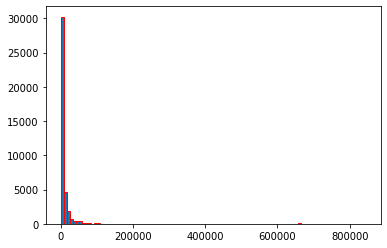

In [ ]:
plt.hist(df[' self_reference_max_shares'], edgecolor="red", bins=100)

#drop

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33cd0f710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33cd79790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33cd74d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33cd744d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33cd0f390>,
  <matplotlib.lines.Line2D at 0x7fb33cd0fdd0>]}

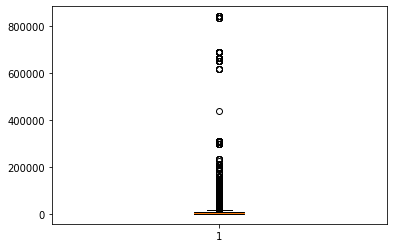

In [ ]:
plt.boxplot(df[' self_reference_max_shares'])

(array([2.1169e+04, 4.4520e+03, 3.1300e+02, 2.1000e+01, 7.4000e+01,
        4.1700e+02, 5.1100e+02, 5.9900e+02, 6.2200e+02, 4.3800e+02,
        5.2600e+02, 3.3300e+02, 5.2900e+02, 2.7900e+02, 2.9300e+02,
        2.9600e+02, 3.6800e+02, 2.1600e+02, 2.3500e+02, 3.2500e+02,
        1.9500e+02, 2.6400e+02, 1.8000e+02, 2.9800e+02, 2.6000e+02,
        1.7200e+02, 1.5000e+02, 2.5700e+02, 2.6800e+02, 2.8700e+02,
        1.3800e+02, 1.9900e+02, 2.0400e+02, 2.1200e+02, 3.7600e+02,
        9.9000e+01, 1.3600e+02, 3.1500e+02, 1.2300e+02, 4.2600e+02,
        7.9000e+01, 1.2000e+02, 2.9900e+02, 3.8900e+02, 6.3000e+01,
        6.6900e+02, 5.5300e+02, 3.5500e+02, 2.0800e+02, 3.3300e+02]),
 array([0.01818197, 0.03635822, 0.05453447, 0.07271072, 0.09088696,
        0.10906321, 0.12723946, 0.14541571, 0.16359196, 0.18176821,
        0.19994445, 0.2181207 , 0.23629695, 0.2544732 , 0.27264945,
        0.2908257 , 0.30900194, 0.32717819, 0.34535444, 0.36353069,
        0.38170694, 0.39988318, 0.41805943, 0.

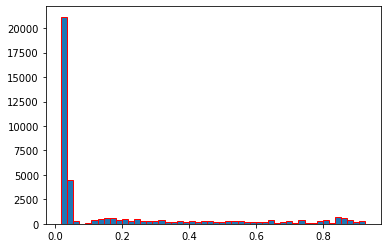

In [ ]:
plt.hist(df[' LDA_00'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33ccd8150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33cb89790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33cbf66d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33cb89bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33ccd4290>,
  <matplotlib.lines.Line2D at 0x7fb33ccd4b90>]}

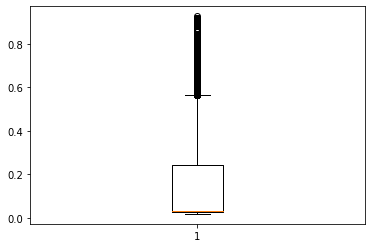

In [ ]:
plt.boxplot(df[' LDA_00'])

(array([2.2196e+04, 5.5880e+03, 5.4200e+02, 1.2000e+01, 8.1000e+01,
        5.2200e+02, 5.1600e+02, 5.9500e+02, 6.8400e+02, 3.6300e+02,
        5.3400e+02, 3.3900e+02, 5.2900e+02, 2.1700e+02, 2.8700e+02,
        3.1100e+02, 3.6400e+02, 1.9100e+02, 2.1200e+02, 3.4400e+02,
        1.9500e+02, 2.1700e+02, 1.7400e+02, 2.1500e+02, 2.2200e+02,
        1.2800e+02, 1.6700e+02, 2.8400e+02, 2.2200e+02, 1.5200e+02,
        1.4600e+02, 1.5500e+02, 1.2400e+02, 1.2900e+02, 2.4000e+02,
        9.4000e+01, 1.5300e+02, 1.8700e+02, 1.0500e+02, 2.0400e+02,
        7.5000e+01, 8.0000e+01, 7.3000e+01, 2.3400e+02, 4.8000e+01,
        3.0700e+02, 3.2800e+02, 2.5200e+02, 1.5000e+02, 1.5600e+02]),
 array([0.01818195, 0.03633725, 0.05449255, 0.07264785, 0.09080316,
        0.10895846, 0.12711376, 0.14526906, 0.16342436, 0.18157966,
        0.19973496, 0.21789026, 0.23604556, 0.25420086, 0.27235616,
        0.29051146, 0.30866676, 0.32682206, 0.34497736, 0.36313267,
        0.38128797, 0.39944327, 0.41759857, 0.

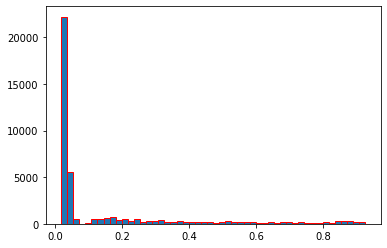

In [ ]:
plt.hist(df[' LDA_01'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33ca68f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33ca71f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33ca78fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33ca78a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33ca71510>,
  <matplotlib.lines.Line2D at 0x7fb33ca71a50>]}

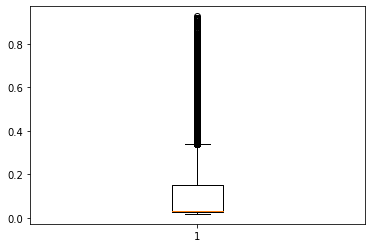

In [ ]:
plt.boxplot(df[' LDA_01'])

(array([1.8352e+04, 4.7140e+03, 4.9900e+02, 1.2000e+01, 8.9000e+01,
        5.1600e+02, 6.0800e+02, 6.5100e+02, 7.0700e+02, 3.4600e+02,
        6.6100e+02, 4.1500e+02, 5.6100e+02, 3.3800e+02, 3.1000e+02,
        3.1600e+02, 4.9900e+02, 2.9500e+02, 2.8400e+02, 3.4800e+02,
        2.0500e+02, 2.6900e+02, 2.0900e+02, 3.1000e+02, 3.1800e+02,
        1.5900e+02, 2.7700e+02, 2.6500e+02, 3.8900e+02, 2.1400e+02,
        1.6000e+02, 2.0100e+02, 2.9400e+02, 1.9700e+02, 3.1000e+02,
        1.7300e+02, 1.2900e+02, 4.2400e+02, 2.0400e+02, 2.6700e+02,
        2.8700e+02, 2.1600e+02, 1.1200e+02, 5.5000e+02, 1.7400e+02,
        6.1300e+02, 1.7000e+02, 6.2100e+02, 9.2200e+02, 4.8300e+02]),
 array([0.01818192, 0.03621826, 0.05425461, 0.07229095, 0.09032729,
        0.10836364, 0.12639998, 0.14443632, 0.16247267, 0.18050901,
        0.19854535, 0.2165817 , 0.23461804, 0.25265438, 0.27069073,
        0.28872707, 0.30676341, 0.32479976, 0.3428361 , 0.36087244,
        0.37890879, 0.39694513, 0.41498147, 0.

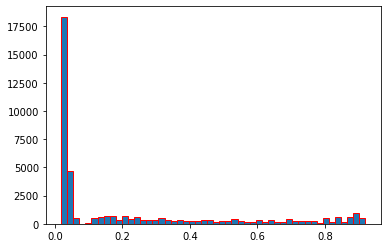

In [ ]:
plt.hist(df[' LDA_02'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c8d52d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33c8dd310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33c8e4350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33c8dddd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33c8d5850>,
  <matplotlib.lines.Line2D at 0x7fb33c8d5d90>]}

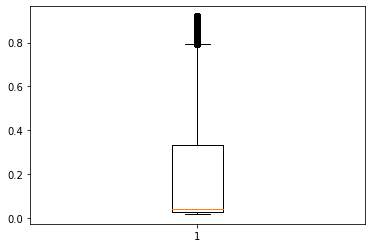

In [ ]:
plt.boxplot(df[' LDA_02'])

(array([18594.,  5260.,   574.,    38.,   147.,   386.,   465.,   438.,
          476.,   394.,   388.,   338.,   408.,   323.,   270.,   253.,
          316.,   215.,   261.,   280.,   252.,   215.,   229.,   261.,
          285.,   193.,   212.,   326.,   292.,   215.,   217.,   267.,
          237.,   247.,   410.,   166.,   270.,   398.,   191.,   425.,
          153.,   278.,   500.,   245.,    93.,   592.,   789.,   779.,
          545.,   537.]),
 array([0.01818199, 0.03634903, 0.05451607, 0.0726831 , 0.09085014,
        0.10901717, 0.12718421, 0.14535124, 0.16351828, 0.18168532,
        0.19985235, 0.21801939, 0.23618642, 0.25435346, 0.2725205 ,
        0.29068753, 0.30885457, 0.3270216 , 0.34518864, 0.36335567,
        0.38152271, 0.39968975, 0.41785678, 0.43602382, 0.45419085,
        0.47235789, 0.49052492, 0.50869196, 0.526859  , 0.54502603,
        0.56319307, 0.5813601 , 0.59952714, 0.61769417, 0.63586121,
        0.65402825, 0.67219528, 0.69036232, 0.70852935, 0.72669639

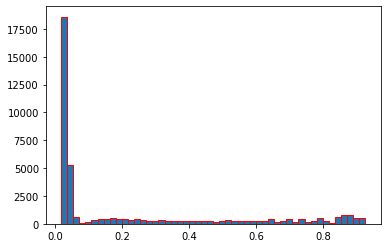

In [ ]:
plt.hist(df[' LDA_03'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c7bc4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33c742550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33c749590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33c749050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33c7bca90>,
  <matplotlib.lines.Line2D at 0x7fb33c7bcfd0>]}

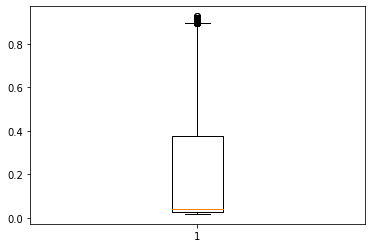

In [ ]:
plt.boxplot(df[' LDA_03'])

(array([16499.,  5503.,   567.,    31.,   127.,   475.,   504.,   537.,
          639.,   557.,   483.,   393.,   595.,   287.,   325.,   420.,
          500.,   228.,   343.,   394.,   321.,   306.,   295.,   414.,
          354.,   196.,   227.,   418.,   348.,   245.,   222.,   309.,
          324.,   271.,   361.,   159.,   280.,   371.,   268.,   453.,
          141.,   323.,   299.,   300.,   204.,   344.,   481.,   590.,
          533.,   879.]),
 array([0.01818228, 0.03636245, 0.05454262, 0.07272279, 0.09090296,
        0.10908313, 0.1272633 , 0.14544347, 0.16362364, 0.18180381,
        0.19998398, 0.21816416, 0.23634433, 0.2545245 , 0.27270467,
        0.29088484, 0.30906501, 0.32724518, 0.34542535, 0.36360552,
        0.38178569, 0.39996586, 0.41814603, 0.4363262 , 0.45450637,
        0.47268654, 0.49086671, 0.50904689, 0.52722706, 0.54540723,
        0.5635874 , 0.58176757, 0.59994774, 0.61812791, 0.63630808,
        0.65448825, 0.67266842, 0.69084859, 0.70902876, 0.72720893

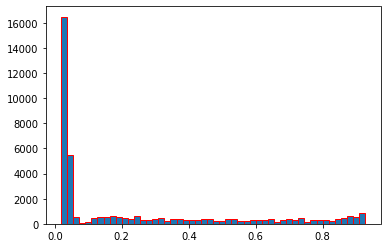

In [ ]:
plt.hist(df[' LDA_04'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c61edd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33c626e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33c62fe50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33c62f910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33c626390>,
  <matplotlib.lines.Line2D at 0x7fb33c6268d0>]}

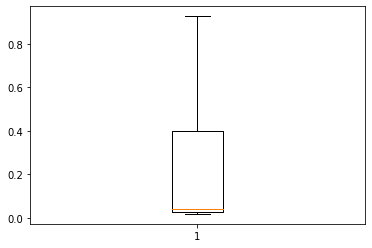

In [ ]:
plt.boxplot(df[' LDA_04'])

(array([1.183e+03, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.200e+01,
        8.000e+00, 2.400e+01, 3.000e+01, 4.800e+01, 8.800e+01, 1.220e+02,
        2.220e+02, 3.560e+02, 4.890e+02, 7.700e+02, 1.091e+03, 1.512e+03,
        1.960e+03, 2.514e+03, 3.146e+03, 3.615e+03, 3.882e+03, 3.962e+03,
        3.389e+03, 3.002e+03, 2.330e+03, 1.783e+03, 1.266e+03, 8.210e+02,
        6.250e+02, 4.250e+02, 3.030e+02, 2.160e+02, 1.420e+02, 8.100e+01,
        7.000e+01, 5.200e+01, 3.700e+01, 1.400e+01, 2.000e+01, 9.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

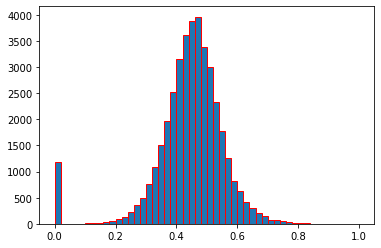

In [ ]:
plt.hist(df[' global_subjectivity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c48ebd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33c4ec090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33c480850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33c480f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33c4f3b10>,
  <matplotlib.lines.Line2D at 0x7fb33c4f3850>]}

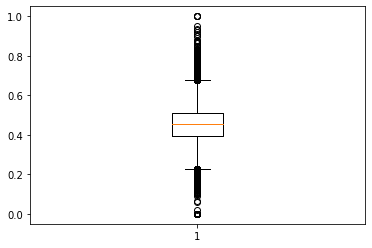

In [ ]:
plt.boxplot(df[' global_subjectivity'])

(array([6.000e+00, 6.000e+00, 8.000e+00, 1.400e+01, 1.300e+01, 1.500e+01,
        1.400e+01, 2.700e+01, 2.400e+01, 4.700e+01, 7.300e+01, 8.400e+01,
        1.420e+02, 2.480e+02, 3.680e+02, 5.460e+02, 9.410e+02, 2.580e+03,
        1.874e+03, 2.483e+03, 3.203e+03, 3.665e+03, 3.967e+03, 4.090e+03,
        3.668e+03, 3.152e+03, 2.440e+03, 1.849e+03, 1.334e+03, 8.890e+02,
        6.340e+02, 3.830e+02, 2.760e+02, 1.600e+02, 1.260e+02, 8.100e+01,
        6.100e+01, 5.000e+01, 2.800e+01, 2.100e+01, 1.500e+01, 1.000e+01,
        1.000e+01, 5.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.39375   , -0.37131818, -0.34888636, -0.32645455, -0.30402273,
        -0.28159091, -0.25915909, -0.23672727, -0.21429545, -0.19186364,
        -0.16943182, -0.147     , -0.12456818, -0.10213636, -0.07970455,
        -0.05727273, -0.03484091, -0.01240909,  0.01002273,  0.03245455,
         0.05488636,  0.07731818,  0.09975   ,  0.12218182,  0.14461364,
         0.

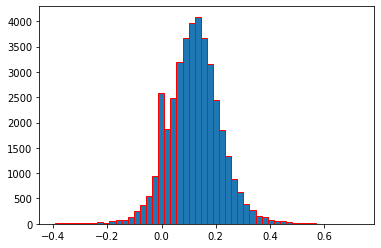

In [ ]:
plt.hist(df[' global_sentiment_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c30b9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33c310a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33c317a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33c317510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33c30bf50>,
  <matplotlib.lines.Line2D at 0x7fb33c3104d0>]}

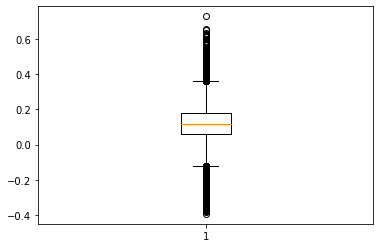

In [ ]:
plt.boxplot(df[' global_sentiment_polarity'])

(array([1.225e+03, 1.020e+02, 2.340e+02, 4.260e+02, 7.330e+02, 1.139e+03,
        1.554e+03, 1.916e+03, 2.237e+03, 2.639e+03, 2.834e+03, 3.121e+03,
        3.060e+03, 2.973e+03, 2.729e+03, 2.416e+03, 2.100e+03, 1.774e+03,
        1.567e+03, 1.222e+03, 9.400e+02, 7.240e+02, 5.450e+02, 3.860e+02,
        2.620e+02, 1.880e+02, 1.380e+02, 1.220e+02, 7.300e+01, 5.700e+01,
        4.900e+01, 3.800e+01, 2.600e+01, 1.800e+01, 1.000e+01, 1.500e+01,
        1.100e+01, 7.000e+00, 6.000e+00, 7.000e+00, 6.000e+00, 1.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.        , 0.00310976, 0.00621951, 0.00932927, 0.01243902,
        0.01554878, 0.01865854, 0.02176829, 0.02487805, 0.0279878 ,
        0.03109756, 0.03420732, 0.03731707, 0.04042683, 0.04353659,
        0.04664634, 0.0497561 , 0.05286585, 0.05597561, 0.05908537,
        0.06219512, 0.06530488, 0.06841463, 0.07152439, 0.07463415,
        0.0777439 , 0.08085366, 0.08

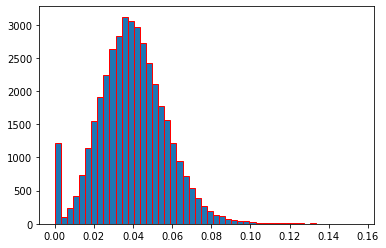

In [ ]:
plt.hist(df[' global_rate_positive_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33c1fe690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33c1866d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33c18f710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33c18f1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33c1fec10>,
  <matplotlib.lines.Line2D at 0x7fb33c186190>]}

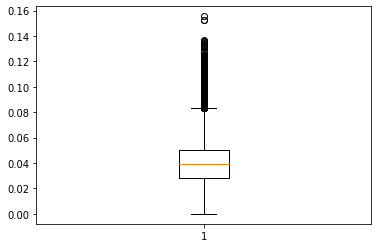

In [ ]:
plt.boxplot(df[' global_rate_positive_words'])

(array([3.359e+03, 3.489e+03, 5.478e+03, 6.523e+03, 6.351e+03, 5.050e+03,
        3.395e+03, 2.071e+03, 1.321e+03, 8.070e+02, 5.690e+02, 3.470e+02,
        2.780e+02, 1.850e+02, 1.510e+02, 1.090e+02, 5.400e+01, 2.100e+01,
        1.800e+01, 1.100e+01, 6.000e+00, 1.500e+01, 1.000e+01, 7.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.00369863, 0.00739726, 0.01109589, 0.01479452,
        0.01849315, 0.02219178, 0.02589041, 0.02958904, 0.03328767,
        0.0369863 , 0.04068493, 0.04438356, 0.04808219, 0.05178082,
        0.05547945, 0.05917808, 0.06287671, 0.06657534, 0.07027397,
        0.0739726 , 0.07767123, 0.08136986, 0.08506849, 0.08876712,
        0.09246575, 0.09616438, 0.09

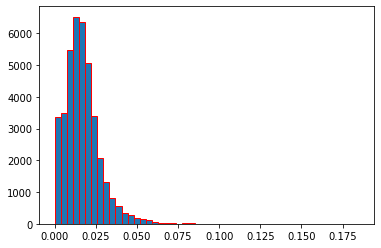

In [ ]:
plt.hist(df[' global_rate_negative_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33ec2b3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33f19b290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33d1be390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33f43c4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33f443590>,
  <matplotlib.lines.Line2D at 0x7fb33d1a5cd0>]}

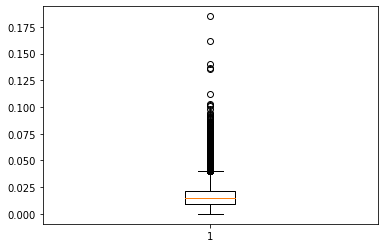

In [ ]:
plt.boxplot(df[' global_rate_negative_words'])

(array([1.216e+03, 1.000e+00, 3.000e+00, 4.000e+00, 9.000e+00, 1.000e+01,
        9.000e+00, 2.100e+01, 2.500e+01, 1.100e+01, 4.500e+01, 4.600e+01,
        7.800e+01, 4.600e+01, 6.900e+01, 9.400e+01, 1.980e+02, 1.000e+02,
        2.020e+02, 1.110e+02, 3.920e+02, 3.630e+02, 3.980e+02, 4.740e+02,
        2.470e+02, 1.410e+03, 8.530e+02, 9.860e+02, 1.232e+03, 9.230e+02,
        1.736e+03, 1.660e+03, 1.495e+03, 2.222e+03, 2.295e+03, 1.935e+03,
        2.258e+03, 2.206e+03, 2.230e+03, 1.427e+03, 2.457e+03, 1.613e+03,
        1.518e+03, 1.057e+03, 8.620e+02, 8.720e+02, 5.080e+02, 2.510e+02,
        9.300e+01, 1.372e+03]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

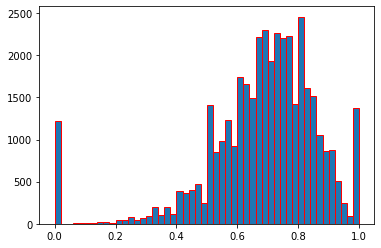

In [ ]:
plt.hist(df[' rate_positive_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33bf24310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33bf2c350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33bf33390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33bf2ce10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33bf24890>,
  <matplotlib.lines.Line2D at 0x7fb33bf24dd0>]}

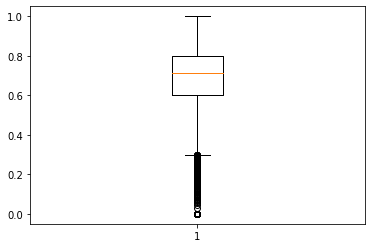

In [ ]:
plt.boxplot(df[' rate_positive_words'])

(array([2.557e+03, 8.300e+01, 2.610e+02, 4.870e+02, 6.270e+02, 1.079e+03,
        1.101e+03, 1.451e+03, 1.685e+03, 1.420e+03, 2.432e+03, 2.169e+03,
        2.278e+03, 2.176e+03, 2.038e+03, 2.203e+03, 2.302e+03, 1.417e+03,
        1.736e+03, 1.024e+03, 1.638e+03, 1.189e+03, 1.037e+03, 8.180e+02,
        3.240e+02, 1.327e+03, 5.160e+02, 3.830e+02, 3.780e+02, 1.980e+02,
        3.070e+02, 1.900e+02, 1.120e+02, 1.950e+02, 9.700e+01, 6.700e+01,
        4.800e+01, 7.600e+01, 4.800e+01, 9.000e+00, 4.700e+01, 2.500e+01,
        2.000e+01, 9.000e+00, 8.000e+00, 1.200e+01, 4.000e+00, 3.000e+00,
        1.000e+00, 3.100e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

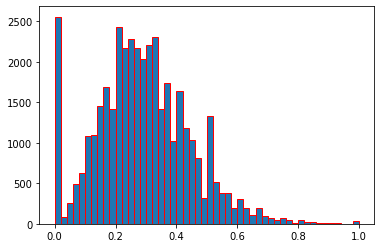

In [ ]:
plt.hist(df[' rate_negative_words'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33bd8cf50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33bd93f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33bd9afd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33bd9aa90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33bd93510>,
  <matplotlib.lines.Line2D at 0x7fb33bd93a50>]}

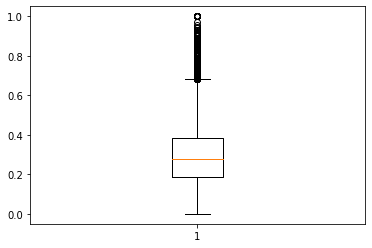

In [ ]:
plt.boxplot(df[' rate_negative_words'])

(array([5.553e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.410e+02,
        2.210e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.045e+03, 0.000e+00,
        3.540e+02, 1.000e+00, 2.830e+02, 2.604e+03, 4.710e+02, 3.000e+01,
        2.520e+02, 0.000e+00, 3.712e+03, 3.000e+00, 1.900e+01, 0.000e+00,
        0.000e+00, 6.894e+03, 3.000e+00, 0.000e+00, 1.320e+02, 9.000e+00,
        4.096e+03, 4.300e+01, 3.000e+00, 4.770e+02, 2.273e+03, 3.550e+02,
        0.000e+00, 1.284e+03, 2.100e+01, 1.506e+03, 3.330e+02, 1.025e+03,
        4.170e+02, 7.630e+02, 3.460e+02, 2.000e+00, 9.000e+01, 1.190e+02,
        1.300e+01, 2.550e+03]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08,

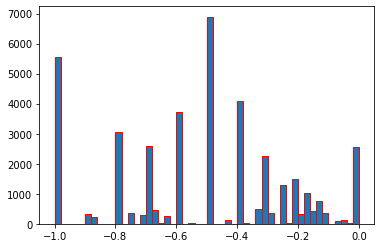

In [ ]:
plt.hist(df[' min_negative_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33bc08750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33bc0d790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33bc157d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33bc15290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33bc08cd0>,
  <matplotlib.lines.Line2D at 0x7fb33bc0d250>]}

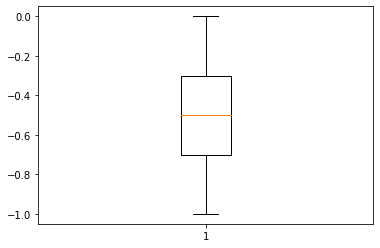

In [ ]:
plt.boxplot(df[' min_negative_polarity'])

(array([5.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01,
        5.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 4.200e+01, 6.000e+00,
        2.000e+01, 1.900e+01, 1.100e+01, 9.000e+01, 3.100e+01, 3.500e+01,
        5.500e+01, 3.500e+01, 2.010e+02, 1.010e+02, 1.470e+02, 1.650e+02,
        1.800e+02, 5.540e+02, 4.010e+02, 5.530e+02, 7.460e+02, 8.170e+02,
        1.480e+03, 1.375e+03, 1.699e+03, 1.986e+03, 2.770e+03, 2.468e+03,
        2.858e+03, 3.052e+03, 2.992e+03, 3.118e+03, 2.424e+03, 2.247e+03,
        1.660e+03, 1.363e+03, 8.560e+02, 1.810e+02, 1.410e+02, 1.230e+02,
        1.600e+01, 2.550e+03]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08,

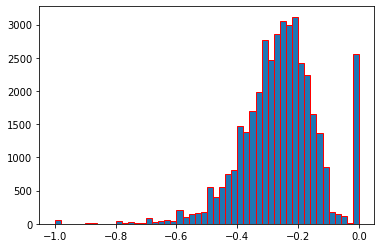

In [ ]:
plt.hist(df[' avg_negative_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33baf2b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33bafab90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33ba80bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33ba80690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33bafa110>,
  <matplotlib.lines.Line2D at 0x7fb33bafa650>]}

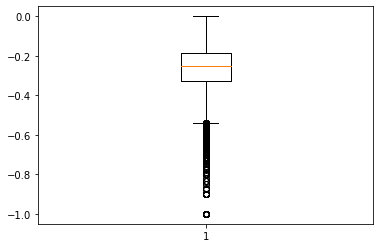

In [ ]:
plt.boxplot(df[' avg_negative_polarity'])

(array([5.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+01, 0.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 5.600e+01, 1.000e+01, 0.000e+00,
        4.000e+00, 0.000e+00, 9.000e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.560e+02, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        5.420e+02, 7.000e+00, 0.000e+00, 1.000e+02, 5.500e+02, 1.210e+02,
        0.000e+00, 4.970e+02, 1.500e+01, 1.233e+03, 6.170e+02, 1.827e+03,
        1.709e+03, 5.609e+03, 8.819e+03, 2.360e+02, 3.295e+03, 9.948e+03,
        9.090e+02, 2.972e+03]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08,

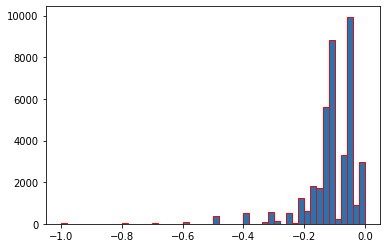

In [ ]:
plt.hist(df[' max_negative_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b957dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b95ee10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b964e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b964910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b95e390>,
  <matplotlib.lines.Line2D at 0x7fb33b95e8d0>]}

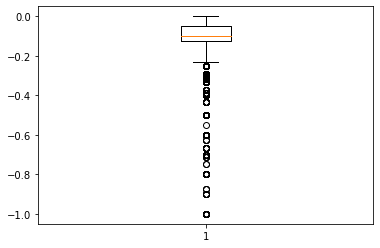

In [ ]:
plt.boxplot(df[' max_negative_polarity'])

(array([1.2160e+03, 7.3990e+03, 4.4120e+03, 2.8050e+03, 1.3300e+02,
        1.5437e+04, 4.0710e+03, 1.0000e+02, 9.2300e+02, 0.0000e+00,
        1.4940e+03, 1.0000e+01, 6.4500e+02, 0.0000e+00, 9.4000e+01,
        1.5300e+02, 7.5000e+01, 1.0600e+02, 1.1000e+02, 0.0000e+00,
        1.3900e+02, 1.6000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

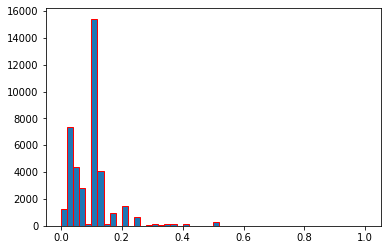

In [ ]:
plt.hist(df[' min_positive_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b7cf650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b7d4690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b7dc6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b7dc190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b7cfbd0>,
  <matplotlib.lines.Line2D at 0x7fb33b7d4150>]}

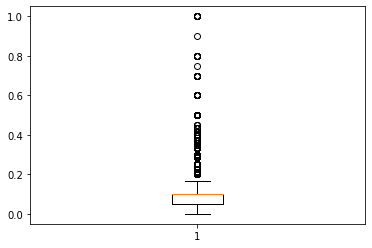

In [ ]:
plt.boxplot(df[' min_positive_polarity'])

(array([1.216e+03, 7.000e+00, 4.000e+00, 1.300e+01, 1.600e+01, 6.200e+01,
        1.020e+02, 1.180e+02, 1.910e+02, 2.870e+02, 5.020e+02, 8.550e+02,
        1.316e+03, 1.814e+03, 2.403e+03, 3.236e+03, 3.729e+03, 4.169e+03,
        4.054e+03, 3.662e+03, 3.255e+03, 2.526e+03, 1.798e+03, 1.233e+03,
        8.770e+02, 7.470e+02, 4.050e+02, 3.000e+02, 2.040e+02, 1.140e+02,
        1.260e+02, 7.400e+01, 6.100e+01, 4.000e+01, 4.500e+01, 9.000e+00,
        1.500e+01, 1.700e+01, 6.000e+00, 2.000e+00, 1.300e+01, 5.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 8.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

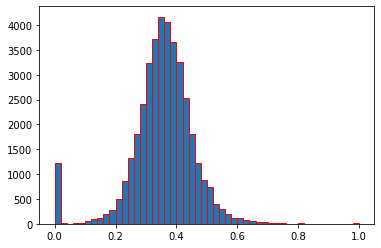

In [ ]:
plt.hist(df[' avg_positive_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b6b8c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b641cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b647d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b6477d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b641250>,
  <matplotlib.lines.Line2D at 0x7fb33b641790>]}

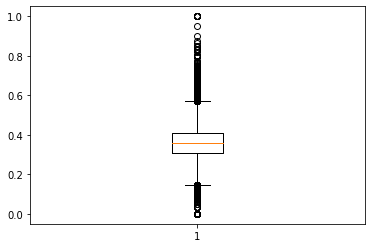

In [ ]:
plt.boxplot(df[' avg_positive_polarity'])

(array([1.2160e+03, 7.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        4.7000e+01, 6.5000e+01, 2.0000e+00, 2.2000e+01, 0.0000e+00,
        9.9000e+01, 1.0000e+00, 1.4000e+02, 0.0000e+00, 2.5000e+01,
        7.7000e+01, 4.9000e+01, 1.0100e+02, 1.6400e+02, 0.0000e+00,
        4.8000e+02, 6.3000e+01, 1.3000e+01, 0.0000e+00, 0.0000e+00,
        6.6210e+03, 0.0000e+00, 1.2200e+02, 0.0000e+00, 0.0000e+00,
        4.1430e+03, 0.0000e+00, 6.0000e+00, 5.5000e+01, 3.1480e+03,
        0.0000e+00, 2.8000e+01, 7.1600e+02, 0.0000e+00, 0.0000e+00,
        5.6040e+03, 1.3000e+01, 6.6400e+02, 0.0000e+00, 0.0000e+00,
        1.1220e+03, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.4821e+04]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

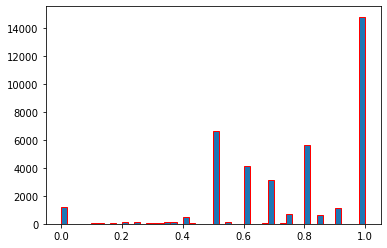

In [ ]:
plt.hist(df[' max_positive_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b52ee90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b513dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b539e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b5398d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b513350>,
  <matplotlib.lines.Line2D at 0x7fb33b513890>]}

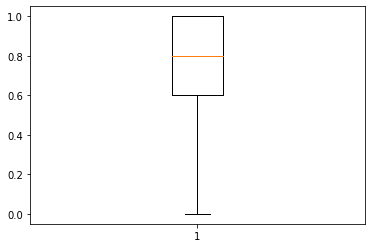

In [ ]:
plt.boxplot(df[' max_positive_polarity'])

(array([1.8012e+04, 4.9000e+01, 1.9500e+02, 4.6800e+02, 3.7000e+01,
        8.0100e+02, 2.1900e+02, 1.7400e+02, 1.8700e+02, 6.3000e+01,
        7.8700e+02, 2.2800e+02, 4.1500e+02, 1.6700e+02, 3.3300e+02,
        1.0320e+03, 7.3100e+02, 2.7600e+02, 5.6400e+02, 1.4400e+02,
        1.4940e+03, 3.1100e+02, 1.4780e+03, 2.1800e+02, 1.0200e+02,
        2.7260e+03, 2.6300e+02, 4.4100e+02, 2.0100e+02, 1.2600e+02,
        7.1900e+02, 1.9600e+02, 5.1500e+02, 4.6900e+02, 6.2900e+02,
        5.5000e+01, 1.5300e+02, 5.2600e+02, 6.3000e+01, 2.3000e+01,
        3.2800e+02, 1.7900e+02, 1.5400e+02, 6.0000e+01, 1.6000e+01,
        6.3000e+02, 9.0000e+00, 1.4300e+02, 7.0000e+00, 2.5270e+03]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

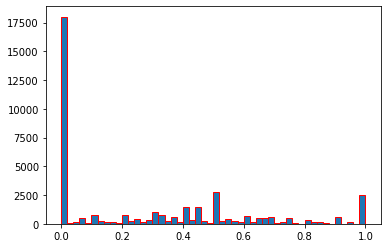

In [ ]:
plt.hist(df[' title_subjectivity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b39f590>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b3ab5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b3b2610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b3b20d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b39f810>,
  <matplotlib.lines.Line2D at 0x7fb33b3ab090>]}

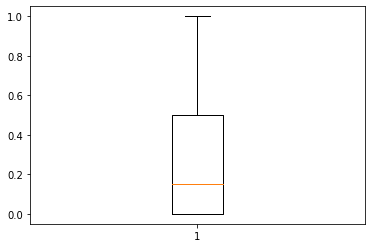

In [ ]:
plt.boxplot(df[' title_subjectivity'])

(array([1.7500e+02, 0.0000e+00, 1.5000e+01, 1.2000e+01, 1.0000e+00,
        7.8000e+01, 1.1000e+01, 1.4000e+02, 2.3000e+01, 3.7000e+01,
        1.9600e+02, 1.8000e+01, 5.5500e+02, 3.5000e+01, 4.4000e+01,
        5.7300e+02, 1.4700e+02, 3.2300e+02, 2.7800e+02, 5.6900e+02,
        3.3400e+02, 8.9000e+02, 5.6100e+02, 5.1700e+02, 2.5400e+02,
        2.0471e+04, 6.7600e+02, 1.1350e+03, 1.8360e+03, 6.0600e+02,
        1.1810e+03, 1.4480e+03, 7.4000e+02, 6.0600e+02, 9.0200e+02,
        2.4900e+02, 1.5300e+02, 2.1460e+03, 1.4100e+02, 3.4200e+02,
        3.2000e+01, 5.4000e+01, 1.9800e+02, 6.5000e+01, 1.0000e+00,
        2.0600e+02, 4.7000e+01, 7.0000e+01, 1.0000e+00, 5.5100e+02]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56

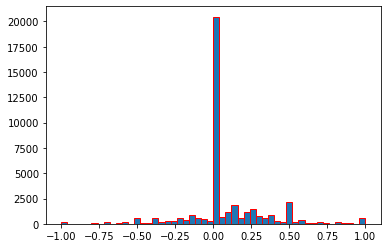

In [ ]:
plt.hist(df[' title_sentiment_polarity'], edgecolor="red", bins=50)

#most titles have neutral sentiment

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b18ea50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b193a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b199ad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b199590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b18efd0>,
  <matplotlib.lines.Line2D at 0x7fb33b193550>]}

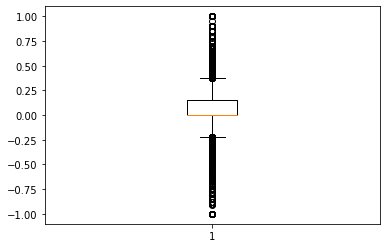

In [ ]:
plt.boxplot(df[' title_sentiment_polarity'])

(array([2.6960e+03, 1.3100e+02, 2.4500e+02, 2.3700e+02, 1.3740e+03,
        5.4500e+02, 2.5800e+02, 2.5200e+02, 2.4400e+02, 4.0000e+01,
        2.0580e+03, 1.4300e+02, 5.9900e+02, 1.6000e+02, 2.3400e+02,
        5.5800e+02, 1.0490e+03, 1.4800e+02, 1.5500e+02, 2.5000e+01,
        1.5280e+03, 3.4300e+02, 1.9700e+02, 1.2400e+02, 1.9000e+01,
        9.2200e+02, 1.1300e+02, 1.7800e+02, 8.7000e+01, 1.6000e+01,
        1.0380e+03, 6.0000e+01, 5.0000e+01, 3.1600e+02, 2.7100e+02,
        5.7000e+01, 3.8000e+01, 2.4100e+02, 2.6000e+01, 3.0000e+00,
        1.4050e+03, 5.0000e+01, 2.1000e+01, 4.5600e+02, 7.0000e+00,
        3.3100e+02, 4.1000e+01, 1.5000e+01, 0.0000e+00, 2.0539e+04]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

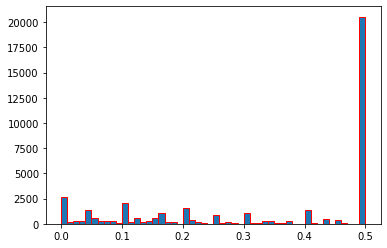

In [ ]:
plt.hist(df[' abs_title_subjectivity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33b009190>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33b00f1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33b018210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33b00fc90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33b009710>,
  <matplotlib.lines.Line2D at 0x7fb33b009c50>]}

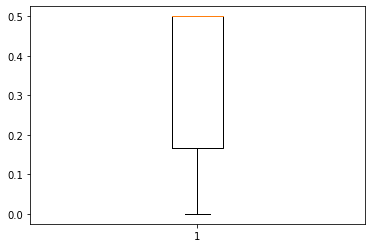

In [ ]:
plt.boxplot(df[' abs_title_subjectivity'])

(array([2.0205e+04, 5.2000e+02, 5.7800e+02, 6.0400e+02, 2.5400e+02,
        1.4510e+03, 2.1330e+03, 5.9500e+02, 6.8000e+02, 2.6000e+02,
        1.5760e+03, 1.7400e+02, 1.5100e+03, 2.1600e+02, 1.8200e+02,
        8.8000e+02, 3.7800e+02, 3.7600e+02, 3.1600e+02, 4.0000e+01,
        1.2430e+03, 1.6900e+02, 1.3100e+02, 5.7000e+01, 1.9000e+01,
        2.6820e+03, 3.1000e+01, 1.2800e+02, 3.9000e+01, 7.0000e+00,
        5.0100e+02, 6.0000e+01, 3.9000e+01, 3.8000e+01, 3.2000e+02,
        1.8000e+01, 2.0000e+00, 7.4000e+01, 0.0000e+00, 4.0000e+00,
        2.8200e+02, 0.0000e+00, 5.1000e+01, 8.0000e+00, 0.0000e+00,
        8.5000e+01, 0.0000e+00, 1.0000e+00, 0.0000e+00, 7.2600e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

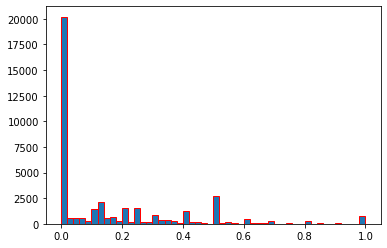

In [ ]:
plt.hist(df[' abs_title_sentiment_polarity'], edgecolor="red", bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33aef4850>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb33aef8890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb33ae7f8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb33ae7f390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb33aef4dd0>,
  <matplotlib.lines.Line2D at 0x7fb33aef8350>]}

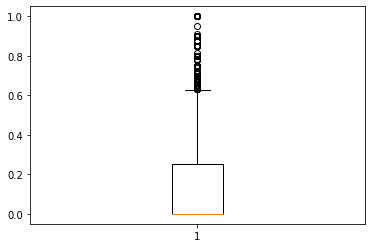

In [ ]:
plt.boxplot(df[' abs_title_sentiment_polarity'])

In [ ]:
cormat = df.corr()
round(cormat,2)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.00,-0.24,-0.06,0.20,0.16,0.19,-0.00,0.06,-0.03,0.00,...,0.05,0.10,-0.00,0.06,-0.06,-0.02,0.04,0.01,-0.00,0.01
n_tokens_title,-0.24,1.00,0.02,-0.05,-0.04,-0.04,-0.05,-0.01,-0.01,0.05,...,-0.03,-0.02,-0.02,-0.03,0.01,0.08,0.00,-0.15,0.04,0.01
n_tokens_content,-0.06,0.02,1.00,-0.40,0.20,-0.22,0.42,0.30,0.34,0.10,...,-0.26,0.42,-0.13,-0.45,0.23,0.00,0.02,0.01,0.01,0.00
n_unique_tokens,0.20,-0.05,-0.40,1.00,0.68,0.94,-0.11,-0.05,-0.24,0.02,...,0.41,0.16,-0.22,0.02,-0.33,-0.01,-0.03,-0.00,-0.02,-0.01
n_non_stop_words,0.16,-0.04,0.20,0.68,1.00,0.77,0.17,0.15,0.01,0.02,...,0.23,0.54,-0.36,-0.32,-0.20,-0.03,-0.01,0.02,-0.03,-0.02
n_non_stop_unique_tokens,0.19,-0.04,-0.22,0.94,0.77,1.00,-0.11,-0.02,-0.29,0.01,...,0.32,0.28,-0.26,-0.10,-0.26,-0.03,-0.03,0.01,-0.04,-0.02
num_hrefs,-0.00,-0.05,0.42,-0.11,0.17,-0.11,1.00,0.40,0.34,0.11,...,-0.08,0.29,-0.15,-0.26,0.05,0.04,0.04,0.01,0.06,0.05
num_self_hrefs,0.06,-0.01,0.30,-0.05,0.15,-0.02,0.40,1.00,0.24,0.08,...,-0.07,0.19,-0.06,-0.12,0.04,-0.01,0.03,0.01,-0.01,-0.00
num_imgs,-0.03,-0.01,0.34,-0.24,0.01,-0.29,0.34,0.24,1.00,-0.07,...,-0.02,0.16,-0.07,-0.14,0.04,0.06,0.05,-0.01,0.06,0.04
num_videos,0.00,0.05,0.10,0.02,0.02,0.01,0.11,0.08,-0.07,1.00,...,-0.01,0.13,-0.12,-0.14,0.03,0.06,0.02,-0.02,0.06,0.02


In [ ]:
cormat[cormat > 0.80]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_tokens_title,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_tokens_content,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_unique_tokens,NaN,NaN,NaN,1.000000,NaN,0.937679,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_non_stop_words,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_non_stop_unique_tokens,NaN,NaN,NaN,0.937679,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_hrefs,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_self_hrefs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_imgs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


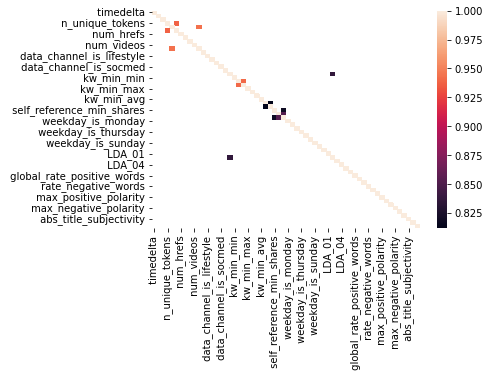

In [ ]:
sns.heatmap(cormat[cormat > 0.80])

In [ ]:
correlated_features = set()
for i in range(len(cormat.columns)):
    for j in range(i):
        if abs(cormat.iloc[i, j]) > 0.8:
            colname = cormat.columns[i]
            print(cormat.columns[i],cormat.columns[j])
            correlated_features.add(colname)

 n_non_stop_unique_tokens  n_unique_tokens
 average_token_length  n_non_stop_words
 kw_avg_min  kw_max_min
 kw_max_max  kw_min_min
 kw_avg_avg  kw_max_avg
 self_reference_avg_sharess  self_reference_min_shares
 self_reference_avg_sharess  self_reference_max_shares
 LDA_02  data_channel_is_world


In [ ]:
correlated_features

#Drop all highly correlated features 
# we will remove n_non_stop_words and keep average_token_length as we have good distribution 
#kw_avg_min High Correlation with kw_max_min which is also omitted
#kw_max_max High Correlation with kw_min_min which is also omitted
#self_reference_avg_sharess, self_reference_max_shares, self_reference_min_shares all correlated with each other drop all

{' LDA_02',
 ' average_token_length',
 ' kw_avg_avg',
 ' kw_avg_min',
 ' kw_max_max',
 ' n_non_stop_unique_tokens',
 ' self_reference_avg_sharess'}

In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
drop_features = ['url', ' timedelta', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_videos', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_avg', ' self_reference_max_shares', ' self_reference_min_shares', ' self_reference_avg_sharess',' LDA_02' ]

In [ ]:
len(drop_features)

16

In [ ]:
len(df.columns)

61

In [ ]:
df.drop(labels=drop_features, axis=1, inplace=True) 

#dropping all irrelevant columns

In [ ]:
len(df.columns) #final column count

45

In [ ]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,num_self_hrefs,num_imgs,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,2.0,1.0,4.680365,5.0,0.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,1.0,4.913725,4.0,0.0,0.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,1.0,4.393365,6.0,0.0,0.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,0.0,1.0,4.404896,7.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,19.0,20.0,4.682836,7.0,0.0,0.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,7.0,1.0,4.523121,8.0,0.0,0.0,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,7.0,3.0,4.405488,7.0,0.0,0.0,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,12.0,5.076923,8.0,0.0,0.0,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,1.0,4.975073,5.0,0.0,0.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
